In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
import pandas as pd
from sklearn import datasets
iris= load_iris()



In [3]:
# print the names of the 13 features
print("Features: ", iris.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", iris.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3,random_state=109)

In [5]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)# Step 3: Train the model on the data
clf.fit(X_train, y_train)# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial


DecisionTreeClassifier(max_depth=2, random_state=0)

In [6]:
y_pred=clf.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [8]:
cm

array([[12,  0,  0],
       [ 0, 15,  2],
       [ 0,  3, 13]], dtype=int64)

[Text(133.92000000000002, 181.2, 'X[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [38, 33, 34]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 4.85\ngini = 0.5\nsamples = 67\nvalue = [0, 33, 34]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.105\nsamples = 36\nvalue = [0, 2, 34]')]

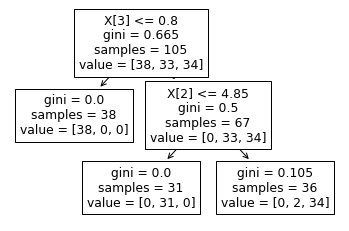

In [9]:
tree.plot_tree(clf)

In [10]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.88      0.86        17
           2       0.87      0.81      0.84        16

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45



In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[12  0  0]
 [ 0 15  2]
 [ 0  1 15]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      0.88      0.91        17
           2       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

Accuracy: 0.9333333333333333


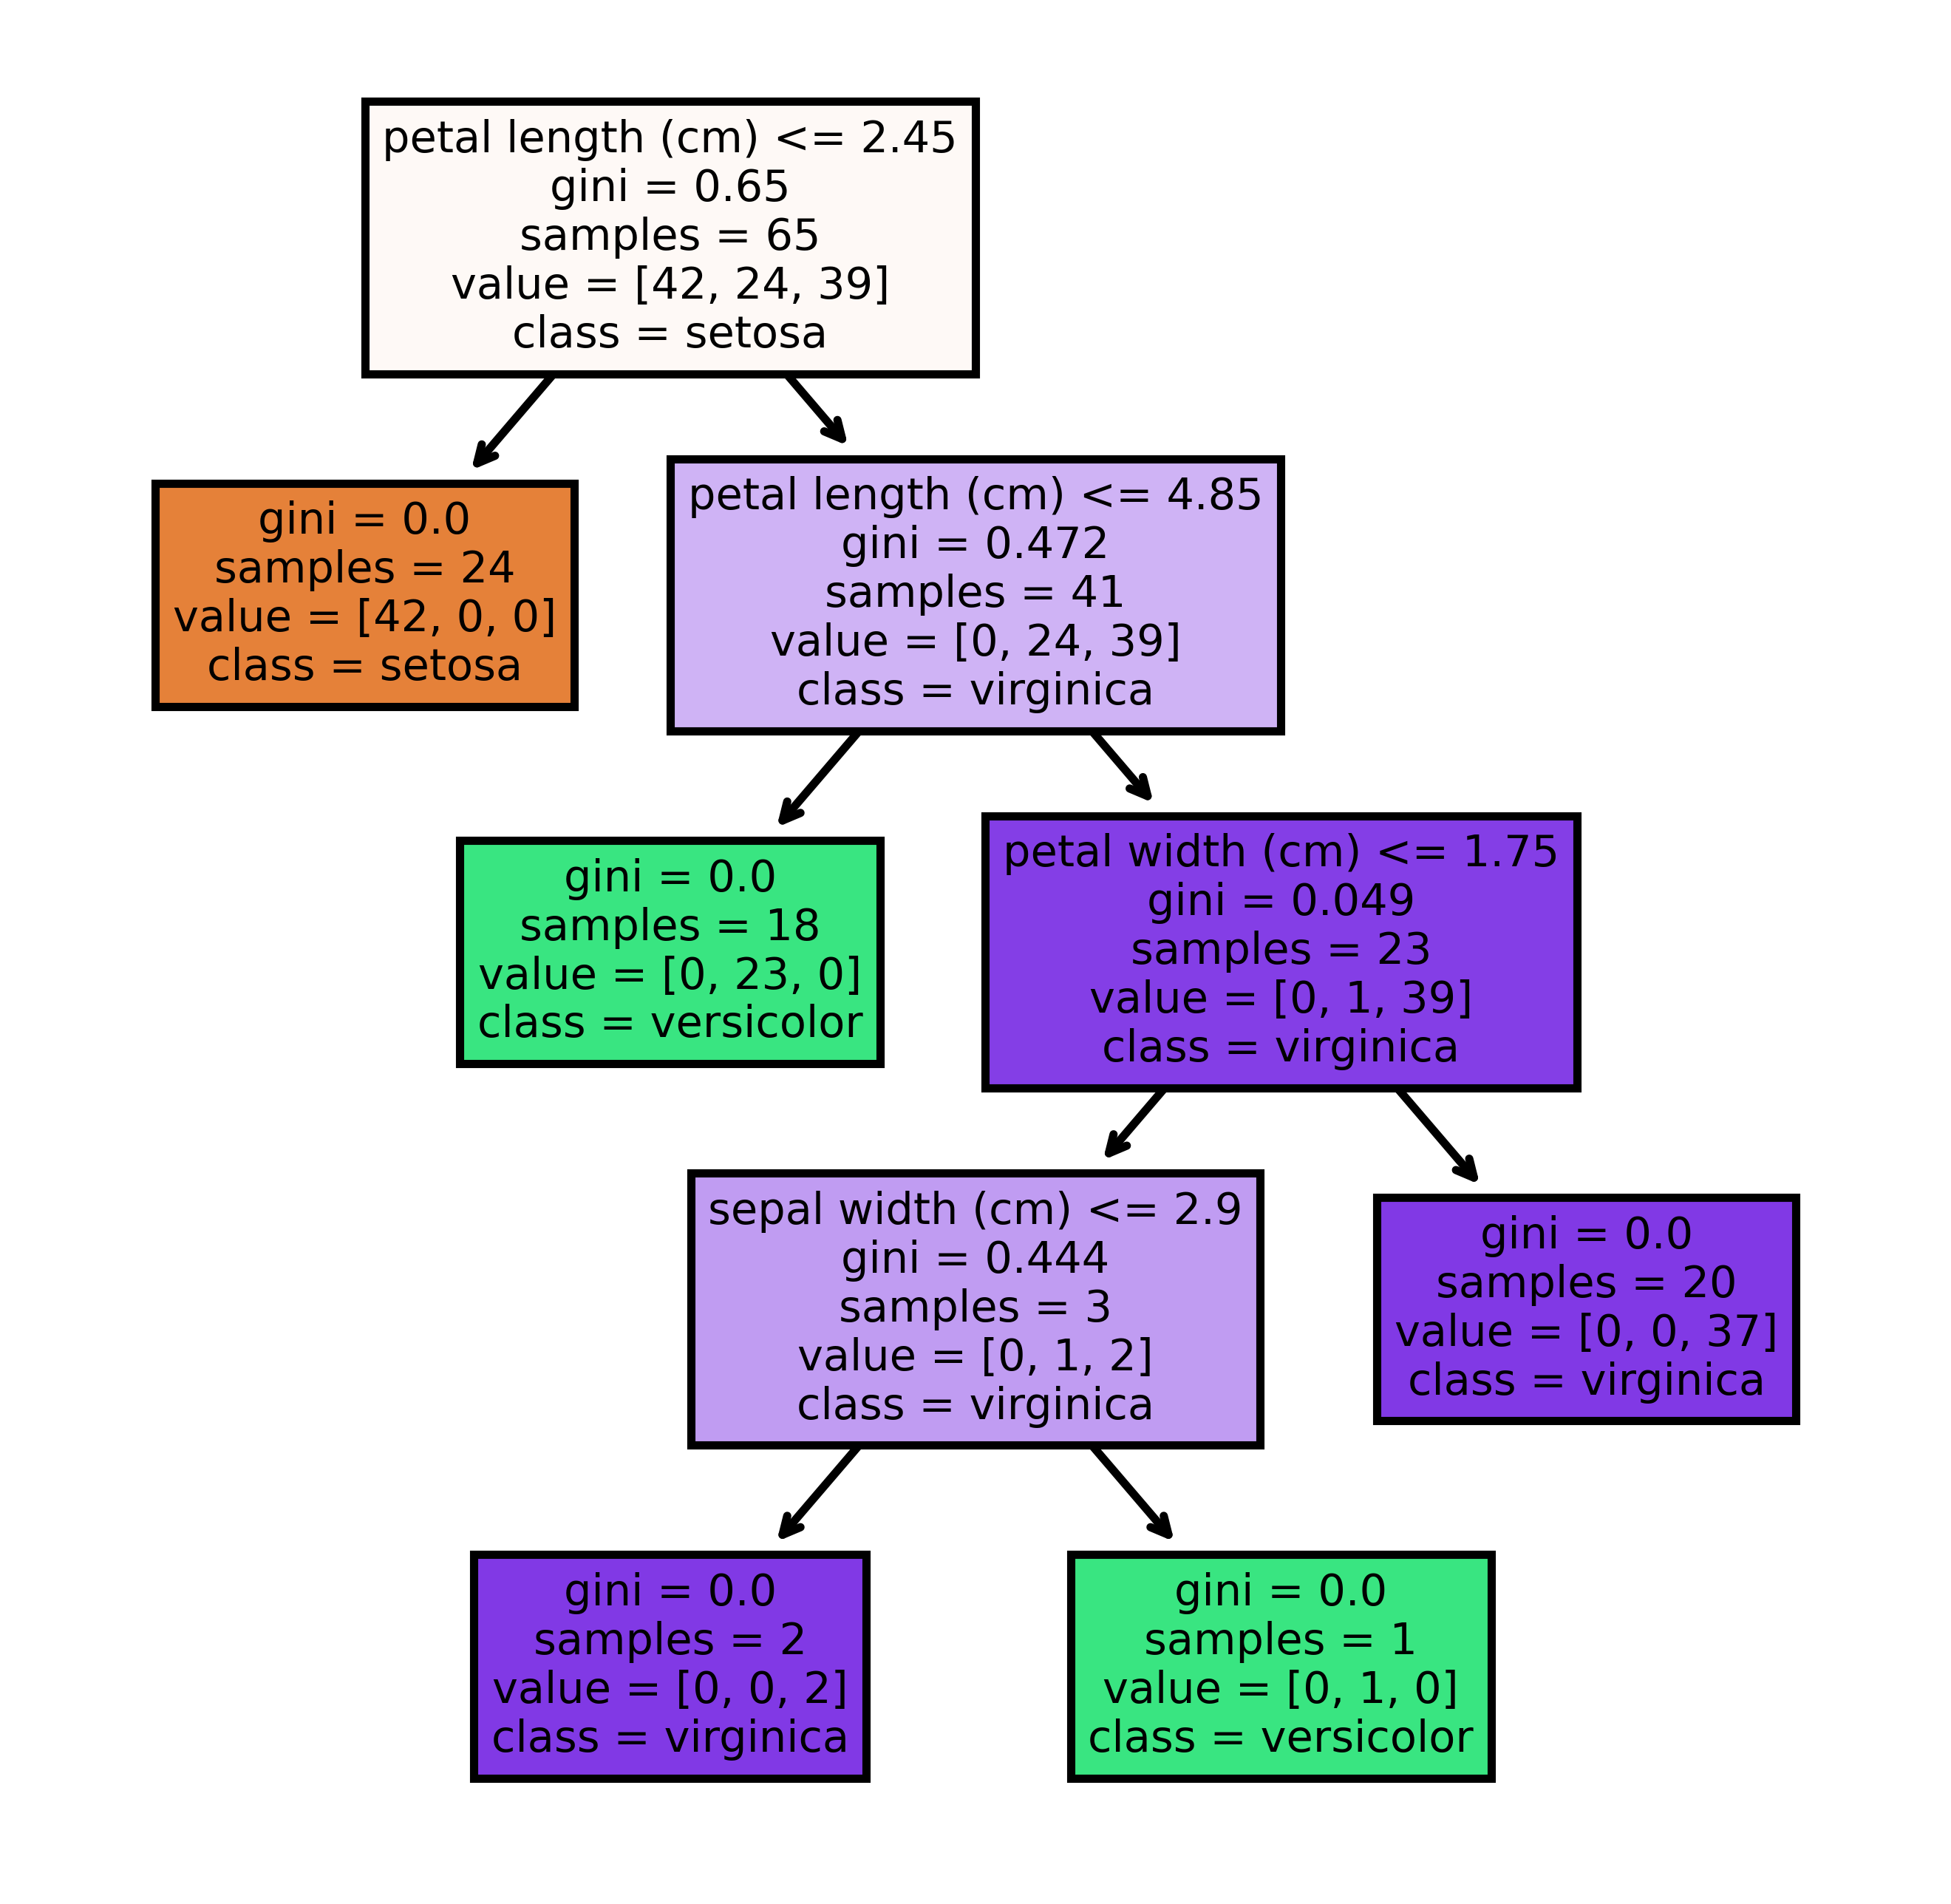

In [24]:
fn=iris.feature_names
cn=iris.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')